In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection  import train_test_split, KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, precision_recall_curve, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
tf.config.run_functions_eagerly(True)
import time

In [4]:
# Use to laod data from file
x_train_full = np.load("./smiley_X_train.npy")
y_train_full = np.load("./smiley_Y_train.npy")
x_test_full = np.load("./smiley_X_test.npy")
y_test_full = np.load("./smiley_Y_test.npy")
print("done")

done


In [5]:
y_train = y_train_full
y_test = y_test_full.astype(np.int)
x_test = x_test_full
x_valid, x_train = x_train_full[:2700], x_train_full[2700:]
y_valid, y_train = y_train_full[:2700].astype(np.int), y_train_full[2700:].astype(np.int)

class_name=["SAD","HAPPY"]

In [6]:
x_train_full.shape, x_valid.shape, x_train.shape, x_test.shape

((27720, 9, 9, 1), (2700, 9, 9, 1), (25020, 9, 9, 1), (9240, 9, 9, 1))

In [7]:
y_train_full.shape, y_valid.shape, y_train.shape, y_test.shape

((27720, 2), (2700, 2), (25020, 2), (9240, 2))

TypeError: ignored

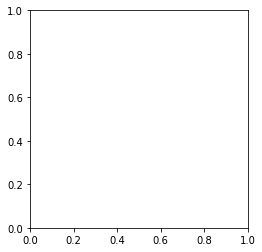

In [8]:
plt.imshow(x_valid[10], cmap = "binary")
plt.show()
class_name[y_valid[10, 0]]

In [10]:
class_name[y_valid[10, 0]]

'HAPPY'

In [11]:
def process_data(dataset):
    output = []
    for i in range(len(dataset)):
        current = dataset[i]
        if current[0] > current[1]:
            output.append(1)
        elif current[0] < current[1]:
            output.append(0)
        else:
            output.append(0)
    return output


def get_scores(model, history, x_test, y_test):
    y_test = y_test[:,0]
    pred = model.predict(x_test)
    pred = process_data(pred)
    # model.summary()  # Include for view of model

    accuracy = accuracy_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    cm = confusion_matrix(y_test, pred)

    print("Accuracy:", accuracy)
    print("F1 Score: ", f1)
    print("Precision Score: ", precision)
    print("Recall Score: ", recall)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])
    cm_display.plot()
    plt.show() 

Epoch 1/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3493 - Accuracy: 0.8329 - val_loss: 0.0892 - val_Accuracy: 0.9663
Epoch 2/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0716 - Accuracy: 0.9710 - val_loss: 0.0520 - val_Accuracy: 0.9737
Epoch 3/5
782/782 [==============================] - 14s 17ms/step - loss: 0.0574 - Accuracy: 0.9741 - val_loss: 0.0490 - val_Accuracy: 0.9737
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.0519 - Accuracy: 0.9738 - val_loss: 0.0518 - val_Accuracy: 0.9763
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.0480 - Accuracy: 0.9751 - val_loss: 0.0516 - val_Accuracy: 0.9719
Training time: 70.38791751861572
289/289 [==============================] - 1s 4ms/step
Accuracy: 0.9738095238095238
F1 Score:  0.9739504843918192
Precision Score:  0.9536256323777403
Recall Score:  0.9951605807303123


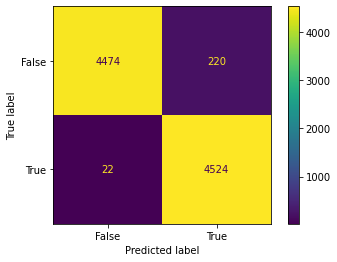

In [12]:
m = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])


m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])


start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)

Epoch 1/5
782/782 [==============================] - 12s 15ms/step - loss: 0.6773 - Accuracy: 0.5773 - val_loss: 0.6478 - val_Accuracy: 0.6667
Epoch 2/5
782/782 [==============================] - 12s 16ms/step - loss: 0.6177 - Accuracy: 0.7001 - val_loss: 0.5858 - val_Accuracy: 0.7441
Epoch 3/5
782/782 [==============================] - 13s 16ms/step - loss: 0.5574 - Accuracy: 0.7612 - val_loss: 0.5247 - val_Accuracy: 0.7933
Epoch 4/5
782/782 [==============================] - 12s 16ms/step - loss: 0.4988 - Accuracy: 0.7997 - val_loss: 0.4670 - val_Accuracy: 0.8244
Epoch 5/5
782/782 [==============================] - 13s 16ms/step - loss: 0.4462 - Accuracy: 0.8207 - val_loss: 0.4182 - val_Accuracy: 0.8411
Training time: 81.96567988395691
289/289 [==============================] - 1s 3ms/step
Accuracy: 0.8361471861471862
F1 Score:  0.8353632013919096
Precision Score:  0.8260215053763441
Recall Score:  0.844918609766828


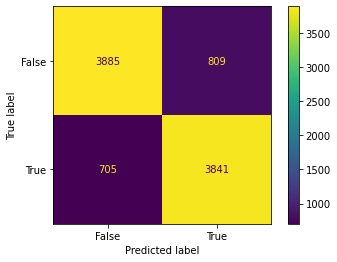

In [13]:
m = keras.models.Sequential([
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])

# Activations: "relu", "sigmoid", "tanh", "softmax", "swish"
# Losses: "BinaryCrossentropy", "Hinge", "SquaredHinge", "MeanAbsoluteError"
# metrics: "BinaryAccuracy", "Hinge", "BinaryCrossentropy", "MeanAbsoluteError", "Accuracy", "Precision","Recall", "TrueNegatives", "TruePositives", "FalseNegatives", "FalsePositives", "AUC"
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)

Epoch 1/5
782/782 [==============================] - 14s 18ms/step - loss: 0.6572 - Accuracy: 0.6591 - val_loss: 0.5971 - val_Accuracy: 0.7804
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.5015 - Accuracy: 0.8188 - val_loss: 0.4037 - val_Accuracy: 0.8585
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.3374 - Accuracy: 0.8769 - val_loss: 0.2778 - val_Accuracy: 0.8985
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2477 - Accuracy: 0.9032 - val_loss: 0.2164 - val_Accuracy: 0.9181
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2002 - Accuracy: 0.9175 - val_loss: 0.1781 - val_Accuracy: 0.9315
Training time: 81.97779679298401
289/289 [==============================] - 1s 4ms/step
Accuracy: 0.9340909090909091
F1 Score:  0.9327294819396885
Precision Score:  0.9367650321721767
Recall Score:  0.9287285525736911


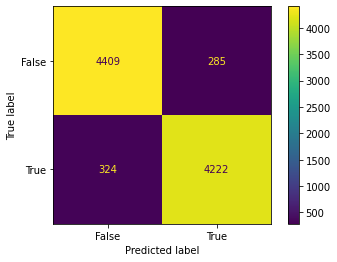

In [14]:
m = keras.models.Sequential([
    keras.layers.Conv2D(10, (2,2), activation="relu", input_shape=(9, 9, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])
m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])

# Activations: "relu", "sigmoid", "tanh", "softmax", "swish"
# Losses: "BinaryCrossentropy", "Hinge", "SquaredHinge", "MeanAbsoluteError"
# metrics: "BinaryAccuracy", "Hinge", "BinaryCrossentropy", "MeanAbsoluteError", "Accuracy", "Precision","Recall", "TrueNegatives", "TruePositives", "FalseNegatives", "FalsePositives", "AUC"
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)


Epoch 1/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6654 - Accuracy: 0.6006 - val_loss: 0.6122 - val_Accuracy: 0.7100
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.5550 - Accuracy: 0.7874 - val_loss: 0.4750 - val_Accuracy: 0.8341
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.4262 - Accuracy: 0.8751 - val_loss: 0.3556 - val_Accuracy: 0.9070
Epoch 4/5
782/782 [==============================] - 15s 19ms/step - loss: 0.3316 - Accuracy: 0.9064 - val_loss: 0.2819 - val_Accuracy: 0.9311
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2733 - Accuracy: 0.9170 - val_loss: 0.2366 - val_Accuracy: 0.9381
Training time: 72.13675665855408
289/289 [==============================] - 1s 4ms/step
Accuracy: 0.9303030303030303
F1 Score:  0.9289496910856134
Precision Score:  0.9318282425852147
Recall Score:  0.9260888693356797


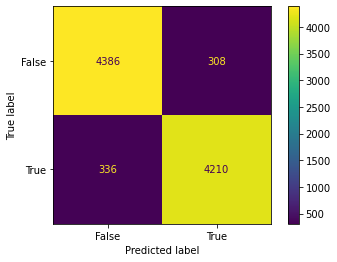

In [15]:
m = keras.models.Sequential([
    keras.layers.Conv2D(10, (3,3), activation="relu", input_shape=(9, 9, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])



# Conv2D (Convolution2D), ConvLSTM2D, DepthwiseConv2D, SeperableConv2D
# AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D



m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])

# Activations: "relu", "sigmoid", "tanh", "softmax", "swish"
# Losses: "BinaryCrossentropy", "Hinge", "SquaredHinge", "MeanAbsoluteError"
# metrics: "BinaryAccuracy", "Hinge", "BinaryCrossentropy", "MeanAbsoluteError", "Accuracy", "Precision","Recall", "TrueNegatives", "TruePositives", "FalseNegatives", "FalsePositives", "AUC"
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)

Epoch 1/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6542 - Accuracy: 0.6121 - val_loss: 0.6124 - val_Accuracy: 0.7063
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 0.5568 - Accuracy: 0.7635 - val_loss: 0.4968 - val_Accuracy: 0.8244
Epoch 3/5
782/782 [==============================] - 14s 18ms/step - loss: 0.4266 - Accuracy: 0.8684 - val_loss: 0.3634 - val_Accuracy: 0.9093
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.3051 - Accuracy: 0.9319 - val_loss: 0.2365 - val_Accuracy: 0.9430
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.1801 - Accuracy: 0.9484 - val_loss: 0.1427 - val_Accuracy: 0.9574
Training time: 81.98415613174438
289/289 [==============================] - 1s 4ms/step
Accuracy: 0.9568181818181818
F1 Score:  0.9564077351687972
Precision Score:  0.9500759713479487
Recall Score:  0.9628244610646722


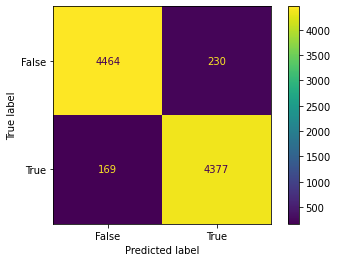

In [16]:
m = keras.models.Sequential([
    keras.layers.Conv2D(10, (4,4), activation="relu", input_shape=(9, 9, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])

m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])

start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)

Epoch 1/5
782/782 [==============================] - 15s 19ms/step - loss: 0.6706 - Accuracy: 0.6162 - val_loss: 0.6389 - val_Accuracy: 0.7285
Epoch 2/5
782/782 [==============================] - 14s 18ms/step - loss: 0.5957 - Accuracy: 0.7828 - val_loss: 0.5431 - val_Accuracy: 0.8459
Epoch 3/5
782/782 [==============================] - 15s 19ms/step - loss: 0.4870 - Accuracy: 0.8584 - val_loss: 0.4268 - val_Accuracy: 0.8978
Epoch 4/5
782/782 [==============================] - 14s 18ms/step - loss: 0.3753 - Accuracy: 0.9086 - val_loss: 0.3293 - val_Accuracy: 0.9259
Epoch 5/5
782/782 [==============================] - 14s 18ms/step - loss: 0.2985 - Accuracy: 0.9261 - val_loss: 0.2715 - val_Accuracy: 0.9363
Training time: 71.76145887374878
289/289 [==============================] - 1s 4ms/step
Accuracy: 0.9362554112554112
F1 Score:  0.9366870901859615
Precision Score:  0.9159133907925163
Recall Score:  0.9584249890013199


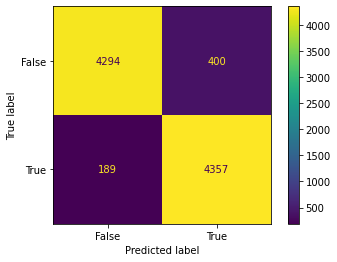

In [17]:
m = keras.models.Sequential([
    keras.layers.Conv2D(10, (5,5), activation="relu", input_shape=(9, 9, 1)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(input_shape= [9, 9]),
    keras.layers.Dense(5, activation="relu"),
    keras.layers.Dense(2, activation="softmax")
])



# Conv2D (Convolution2D), ConvLSTM2D, DepthwiseConv2D, SeperableConv2D
# AveragePooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D, MaxPooling2D



m.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01),
          loss="BinaryCrossentropy",
          metrics=["Accuracy"])

# Activations: "relu", "sigmoid", "tanh", "softmax", "swish"
# Losses: "BinaryCrossentropy", "Hinge", "SquaredHinge", "MeanAbsoluteError"
# metrics: "BinaryAccuracy", "Hinge", "BinaryCrossentropy", "MeanAbsoluteError", "Accuracy", "Precision","Recall", "TrueNegatives", "TruePositives", "FalseNegatives", "FalsePositives", "AUC"
# lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.9)

start_time = time.time()
r = m.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))
print("Training time:", time.time() - start_time)
get_scores(m, r, x_test, y_test)